In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 500
ESTIMATION_WINDOW = 365 * 3

ESTIMATOR = CovEstimators.LAST_OPTIMAL.value(shrinkage_type="linear")

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [01:31<00:00,  3.08it/s]


StrategyStatistics:
* final_nav = 5.320956
* geom_avg_total_r = 0.091903
* geom_avg_xs_r = 0.063619
* std_xs_r = 0.154508
* min_xs_r = -0.082676
* max_xs_r = 0.058633
* skew = -0.474121
* kurtosis = 6.902379
* max_dd = -0.426207
* sharpe = 0.411751
* alpha_buy_hold = 0.014332
* tracking_error_buy_hold = 0.188341
* ir_buy_hold = 0.076095
* factor_loadings = {'low_risk': 0.3766246760570041, 'momentum': 0.0313613076144718, 'quality': -0.015081253062195363, 'size': 0.1526586579659319, 'value': -0.18761622107351927, 'spx': 0.5300793447908567}
* alpha_benchmark = 0.024920
* alpha_benchmark_pvalue = 0.286573
* tracking_error_benchmark = 0.127268
* ir_benchmark = 0.195804
* ttest_pval = 0.486984
* levene_pval = 0.000000
* timing_ability_coef = -0.110710
* timing_ability_pval = 0.000000

In [6]:
result.std_xs_r, result.sharpe

(0.15450813614270506, 0.41175100961859457)

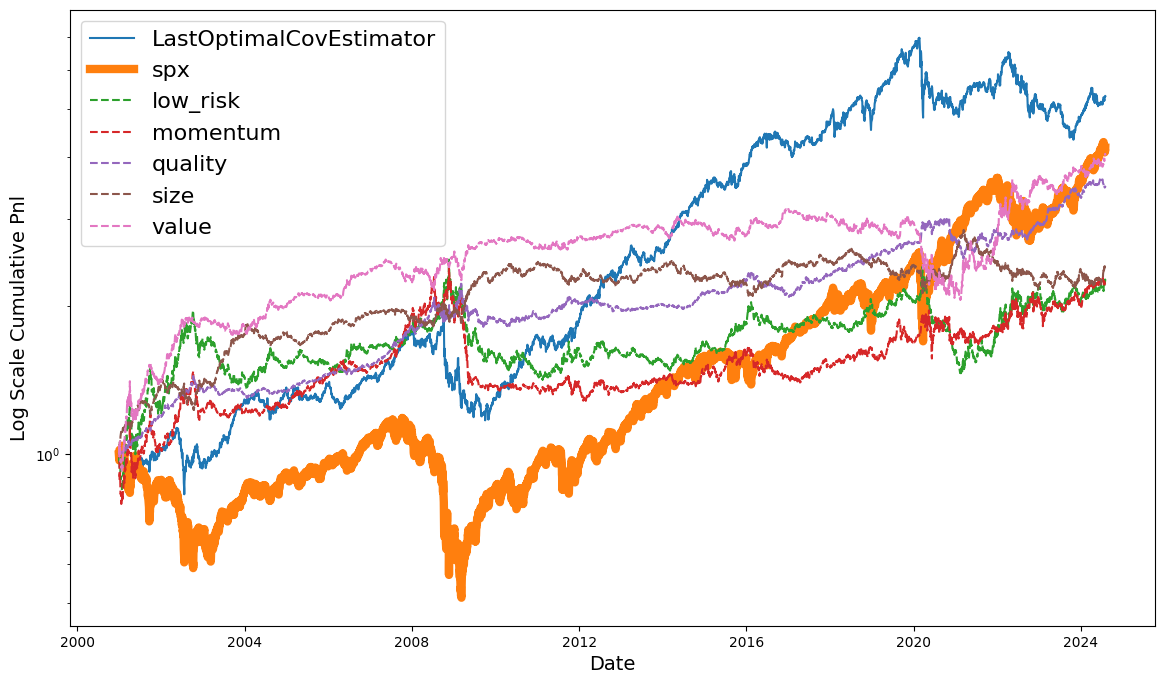

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

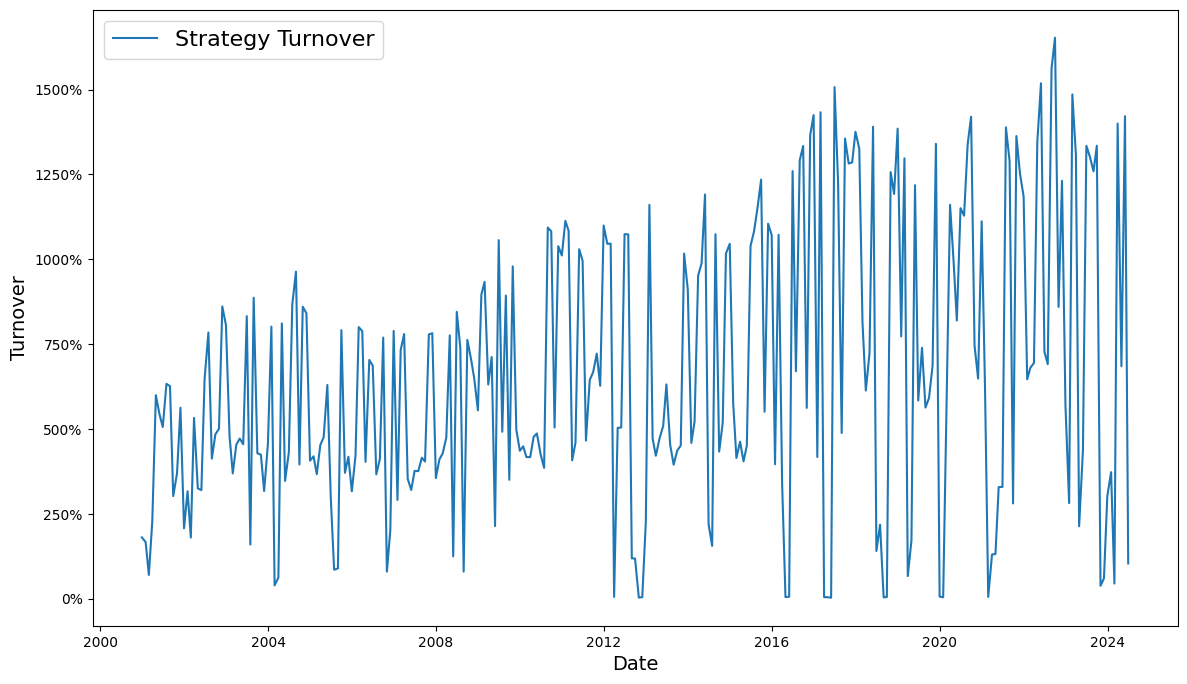

In [8]:
runner.plot_turnover()

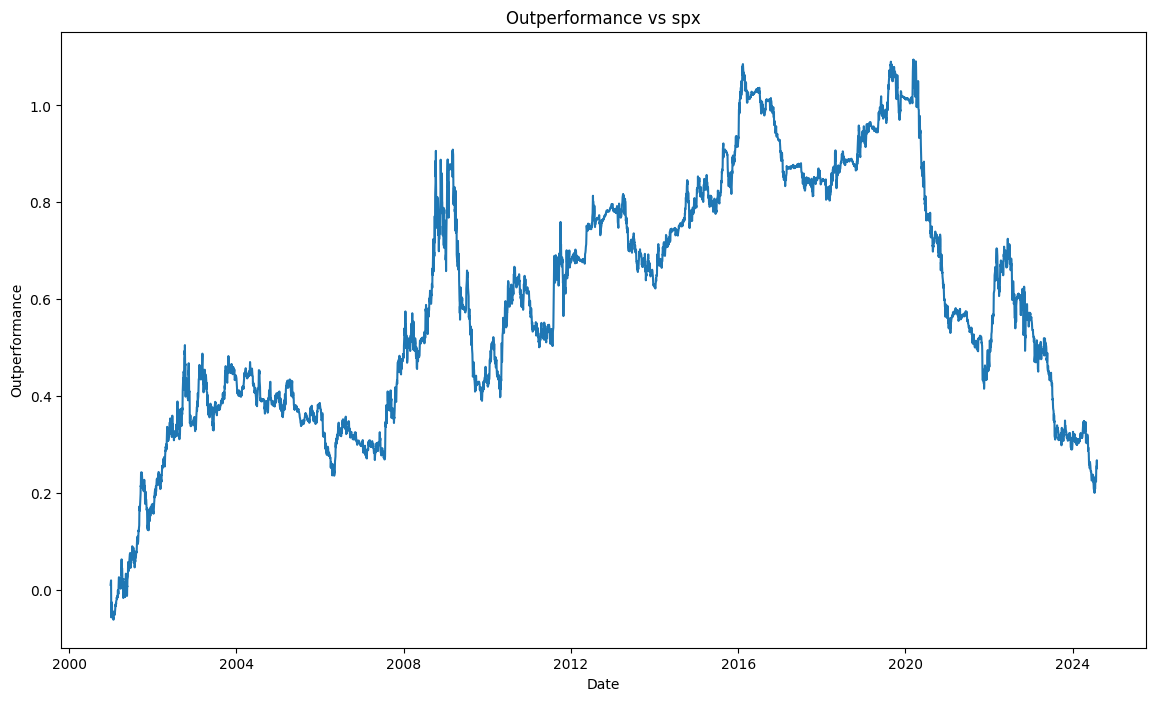

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")